# C-grid interpolation: motivation and introduction

In [delandmeter et al., 2019](https://www.geosci-model-dev.net/12/3571/2019/), we developed a specific interpolator for C-grids. The construction of this interpolator in 2D and 3D grids, for rectilinear and curvilinear meshes, is described in the paper and implemented in [Parcels code](http://www.oceanparcels.org) and this repository.

In this notebook, we develop the motivation to this approach, showing why a specific interpolator is necessary for C-grids, using a simple benchmark.

## Benchmark: conservative analytical flow

Let's define the simple flow:

\begin{cases}
u &= |x|\\
v &= -y \: \text{sign}(x),
\end{cases}

for wich the continuity equation $u_x + v_y = 0$ holds.

To visualize the flow, let's integrate the trajectory of 40 particles (Fig. 1)
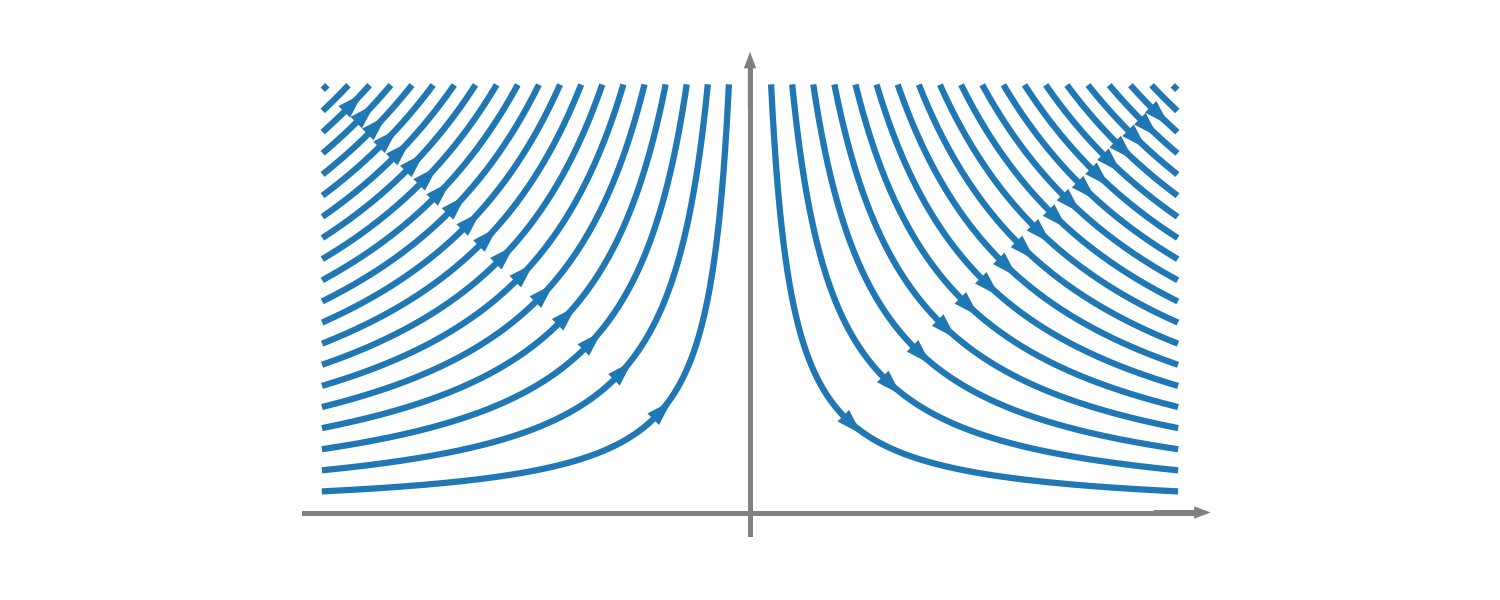
<h5 align="center"> Fig. 1: Analytical flow on the domain [-1:1]x[0:1].
    
### A-grid interpolation

Let's now interpolate the field on an A-grid. To do so, we mesh the domain into 2 cells with $dx=1$. One cell for negative $x$ and the other cell for positive $x$.

The field discretised on the A-grid (with nodes in black on Fig. 2) is interpolated following Eq. 1 of the paper. Integrating the particles on the discretised field leads to a perfect trajectory:
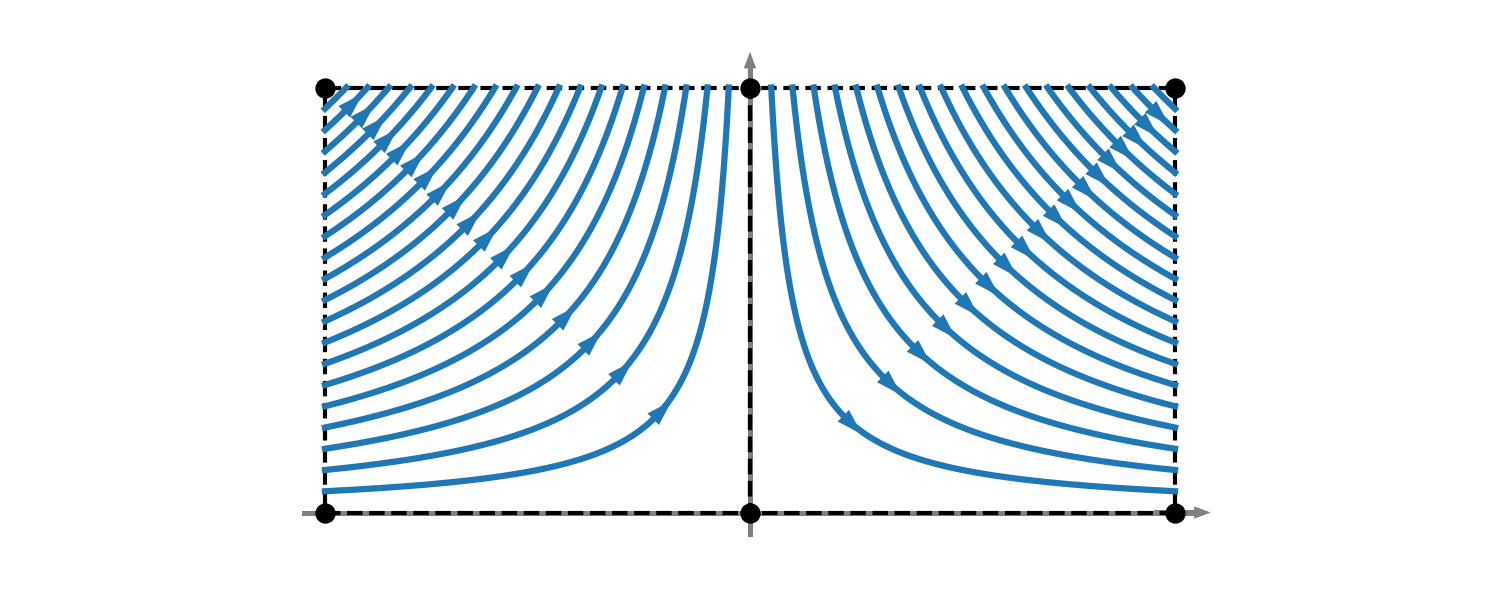
<h5 align="center"> Fig. 2: Particle trajectories on a A-grid using 2 mesh cells. Nodal values are located on the mesh vertices (in black). </h5> 

It is not luck that the particles are perfectly integrated, even on a coarse mesh. This results from the original flow which is bi-linear, such as the A-grid interpolator.

### C-grid mesh

Let's now build a C-grid mesh of the same domain, again with 2 cells with $dx=1$ (Fig. 3).
Each cell has only 2 U-nodes (in red) and 2 V-nodes (in green).

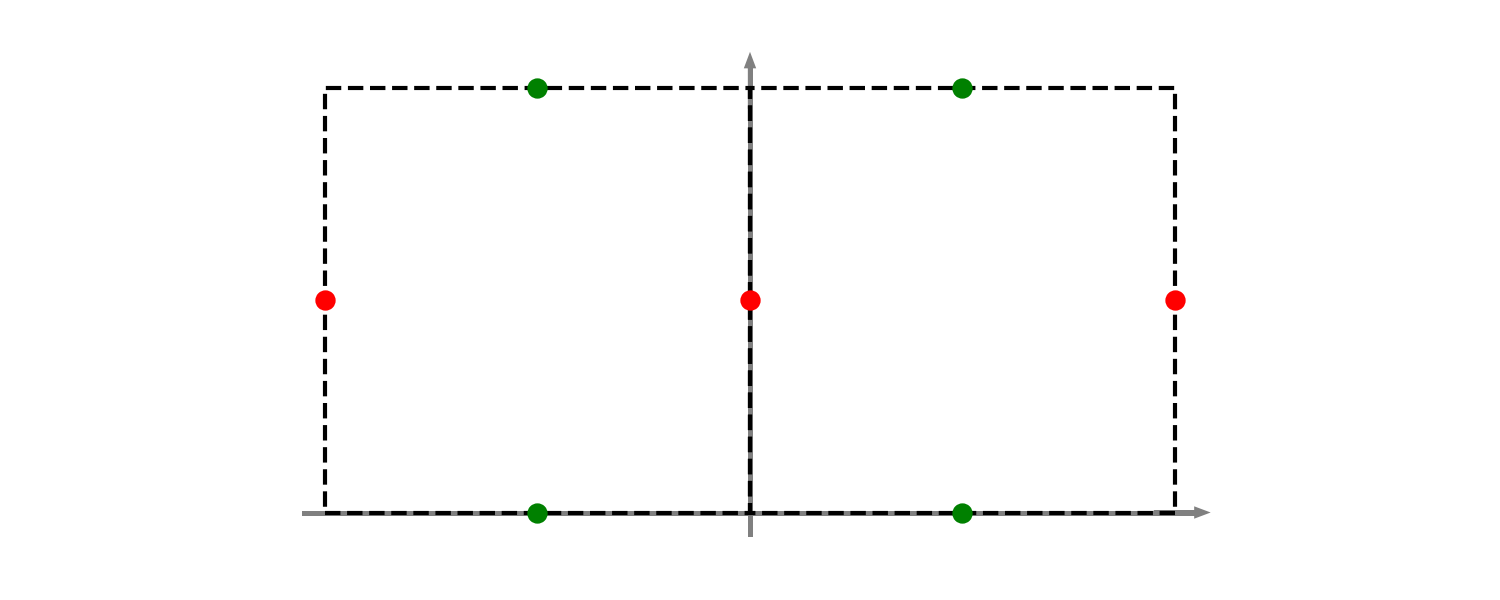
<h5 align="center"> Fig. 3: C-grid mesh. </h5>

### 2 staggered A-grids interpolation

The C-grid mesh (Fig. 3) could be naively interpreted as the combination of 2 staggered A-grids (Fig. 4)
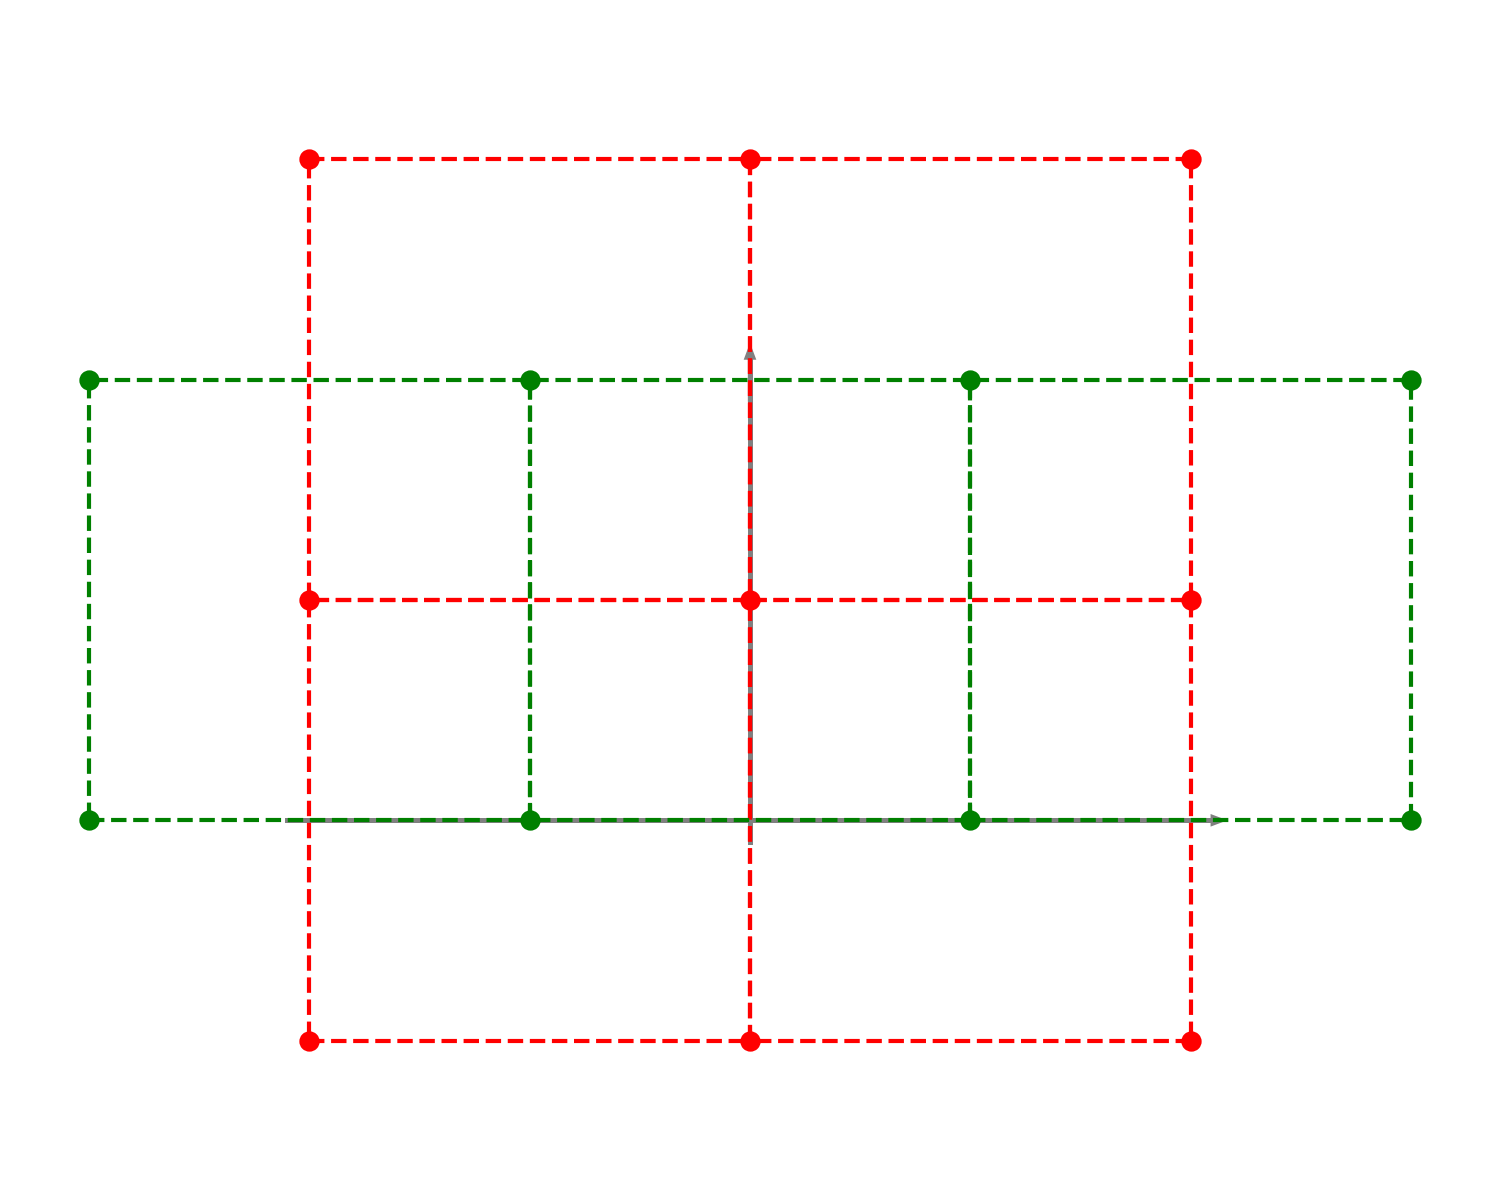
<h5 align="center"> Fig. 4: C-grid interpreted as 2 staggered A-grids. </h5>

In such case, the $u$ velocity could be interpolated on the $U$ mesh and the $v$ velocity on the $V$ mesh. While this approach is very simple, it results in a wrong dynamics, especially close to the boundary (Fig. 5)
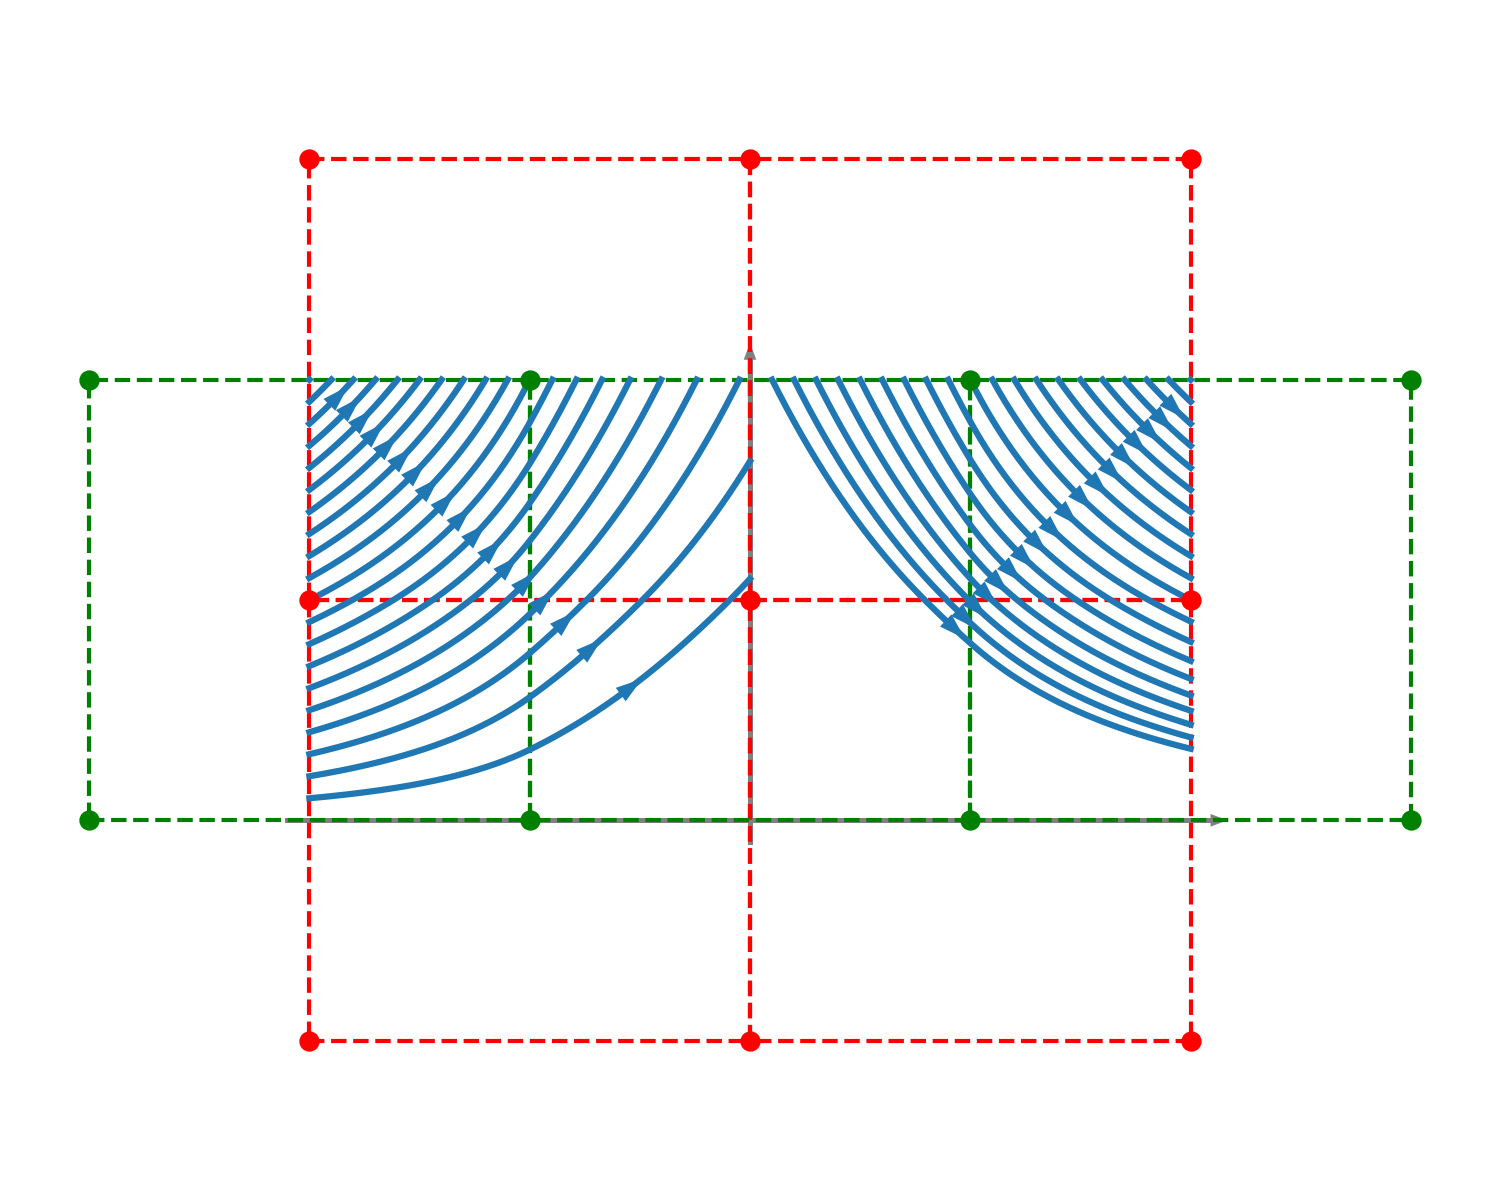
<h5 align="center"> Fig. 5: Particle trajectories on two staggered A-grid using 2 mesh cells, resulting in a wrong dynamics. </h5>

### C-grid interpolation

The solution consists in interpolating direcly the C-grid mesh, as defined in Eqs 7-10 of the paper.
In this simple example, Eqs 7-10 reduce to the simple equation:
\begin{cases}
u &= (1-\xi) U_0 + \xi U_1\\
v &= (1-\eta) V_0 + \eta V_1.
\end{cases}
The C-grid interpolation reproduces exactly the particle dynamics (Fig. 6).

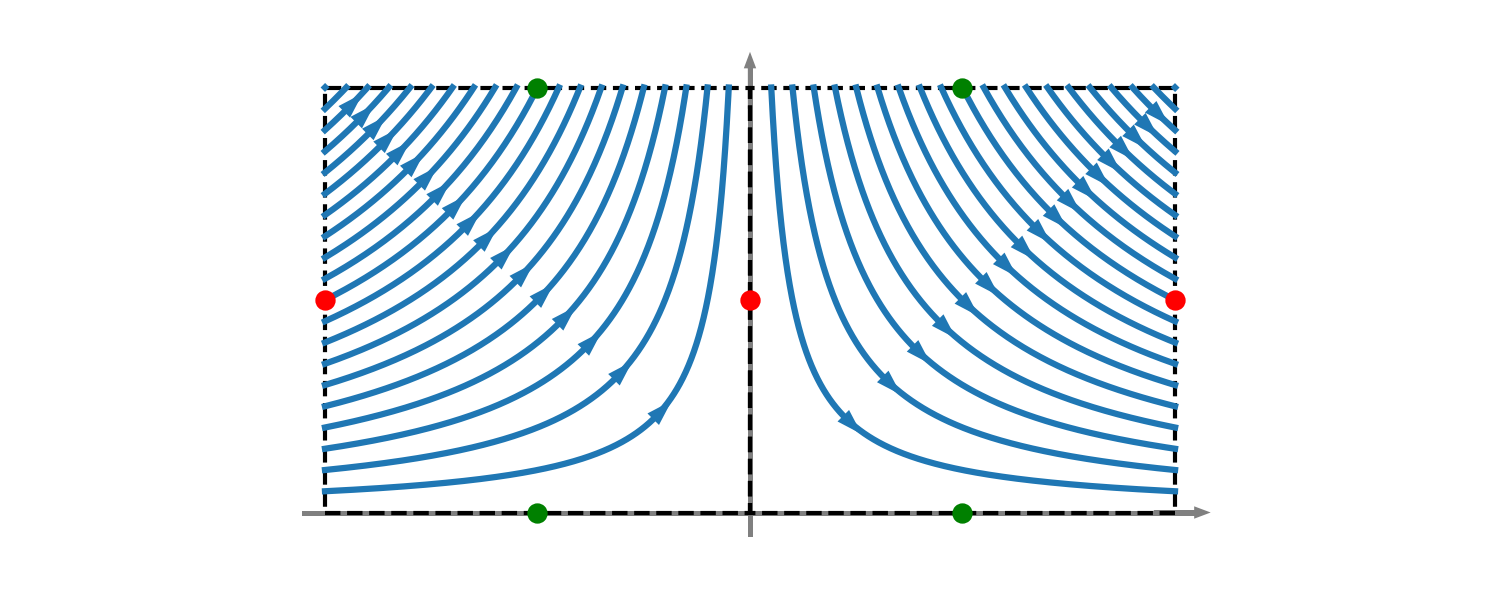
<h5 align="center"> Fig. 6: Particle trajectories on the C-grid, resulting in the correct dynamics. </h5>

## Conclusion
In this simple example, we have shown how a simple flow is interpolated exactly by both A- and C-grids, noting that if a flow is provided on a C-grid, interpolating it as two staggered A-grids will result in an erroneous dynamics.
The error is not always as strong as illustrated in this example. It tends to be small on high resolution meshes and flows with low vorticity. However, errors can be particularly large close to boundaries, which are particularly important in a number of applications and should be treated carefully. The C-grid interpolator is an accurate scheme to resolve the flow as provided by the data.